In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import itertools
import datetime
import matplotlib.dates as mdates

In [61]:
#Read in the data 
# df = pd.read_csv('Data_for_graph.csv’)
# filename = 'Monthly Standard Report 8.xlsx'
filename = 'Monthly Standard Report 8.xlsx'
tab_name = 'Raw QC Data'
# directory = '/Users/SPH/qc_data/'
directory = './data/'




min_date = datetime.date(2020, 1,1)
max_date = datetime.date(2020, 2,24)

In [62]:
df = pd.read_excel(directory+filename,sheet_name=tab_name,header=6)
df

,Date of Result,Result Value,Omission Status,QC ID,Lot No.,Level,Units,Site,Analyzer,Analyte
0,Jul 02 2019 11:34,77.0,NaN,CONT1,93003E,Negative,ng/mL,KENNEDY,Diana1,FIT
1,Jul 02 2019 16:35,71.0,NaN,CONT1,93003E,Negative,ng/mL,KENNEDY,Diana1,FIT
2,Jul 03 2019 12:30,79.0,NaN,CONT1,93003E,Negative,ng/mL,KENNEDY,Diana1,FIT
3,Jul 03 2019 14:19,80.0,NaN,CONT1,93003E,Negative,ng/mL,KENNEDY,Diana1,FIT
4,Jul 04 2019 12:24,75.0,NaN,CONT1,93003E,Negative,ng/mL,KENNEDY,Diana1,FIT
...,...,...,...,...,...,...,...,...,...,...
4627,Feb 21 2020 01:48,784.0,NaN,CEQAL3,93003E,C3,ng/mL,KENNEDY,Diana2,FIT
4628,Feb 21 2020 11:36,821.0,NaN,CEQAL3,93003E,C3,ng/mL,KENNEDY,Diana2,FIT
4629,Feb 22 2020 01:25,783.0,NaN,CEQAL3,93003E,C3,ng/mL,KENNEDY,Diana2,FIT
4630,Feb 22 2020 16:39,841.0,NaN,CEQAL3,93003E,C3,ng/mL,KENNEDY,Diana2,FIT


In [63]:
qc_ids = df[' QC ID'].unique()
print(qc_ids)

analyzers = df[' Analyzer'].unique()
print(analyzers)

['CONT1' 'CONT2' 'CONT3' 'CEQAL1' 'CEQAL2' 'CEQAL3']
['Diana1' 'Diana2' 'Diana3']


In [64]:
list(df)

['Date of Result',
 ' Result Value',
 ' Omission Status',
 ' QC ID',
 ' Lot No.',
 ' Level',
 ' Units',
 ' Site',
 ' Analyzer',
 ' Analyte']

In [65]:
#Convert the date column to a recognised format called ‘datetime'
df['Date of Result'] = pd.to_datetime(df['Date of Result'], infer_datetime_format=True)

In [66]:
df['Date of Result']

0      2019-07-02 11:34:00
1      2019-07-02 16:35:00
2      2019-07-03 12:30:00
3      2019-07-03 14:19:00
4      2019-07-04 12:24:00
               ...        
4627   2020-02-21 01:48:00
4628   2020-02-21 11:36:00
4629   2020-02-22 01:25:00
4630   2020-02-22 16:39:00
4631   2020-02-22 22:24:00
Name: Date of Result, Length: 4632, dtype: datetime64[ns]

In [67]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12}

matplotlib.rc('font', **font)

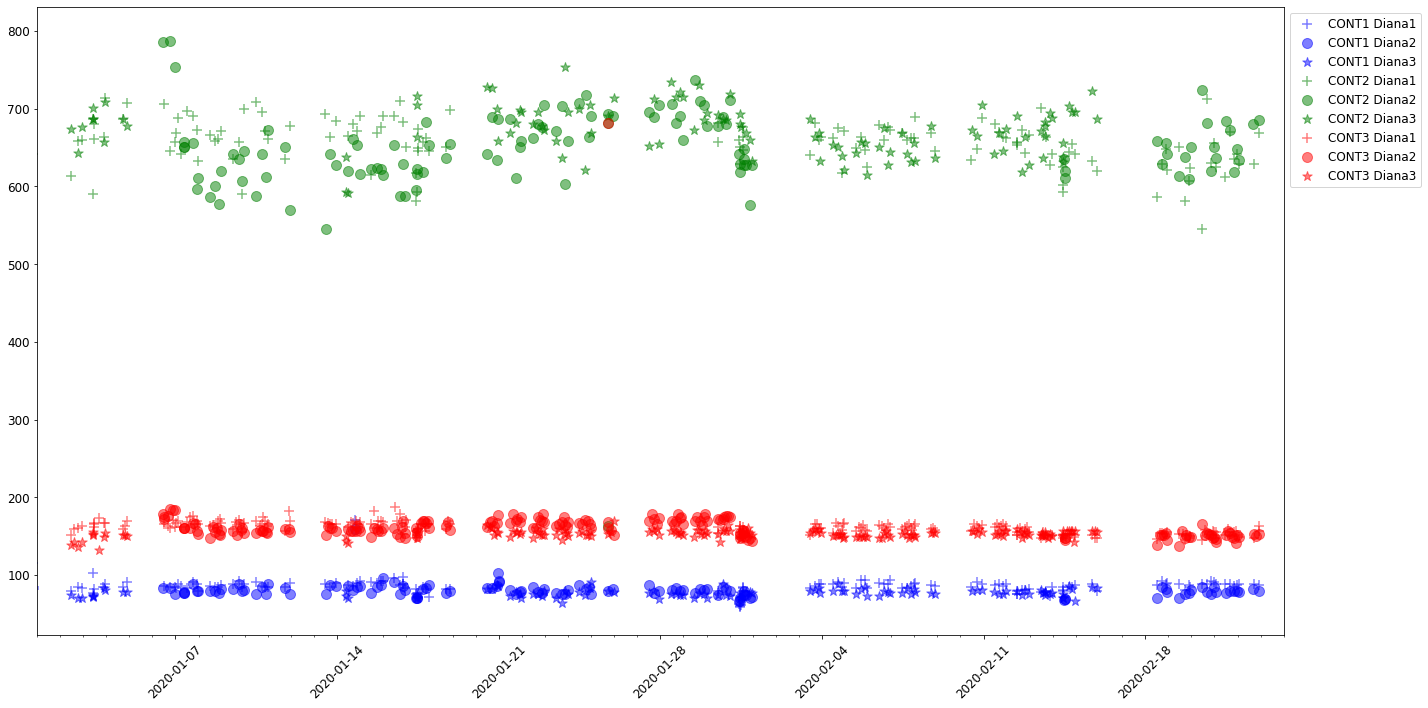

In [69]:





markers = itertools.cycle(('+', 'o', '*')) 
colours = itertools.cycle(('b', 'g', 'r','c','m','k')) 

#plot the data
# plt.figure()
fig, ax = plt.subplots(figsize=(20,10))
for qc_id in ['CONT1','CONT2','CONT3']:
    df_tempory = df[df[' QC ID'] == qc_id]
    colour = next(colours)
    for analyzer in analyzers:
        df_tempory2 = df_tempory[df_tempory[' Analyzer'] == analyzer]
        plt.scatter(df_tempory2['Date of Result'].values,df_tempory2[' Result Value'].values,s=100,c=colour,marker = next(markers),alpha=0.5,label = qc_id+' '+analyzer)

        
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
weeks = mdates.WeekdayLocator()  # every week
days = mdates.DayLocator()  # every day
hours = mdates.HourLocator(interval=4)  # every hour


if (max_date-min_date).days > 7:
    ax.xaxis.set_major_locator(weeks) # could substitute in years, months, or days for 'weeks' here (as defined above)
    ax.xaxis.set_minor_locator(days) # interval for the small lines on the axis
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) # could swap %Y-%m-%d for e.g. '%d/%m' to have day then month with a slash in between. See thhis link for pretty comprehesive date formating list https://www.ibm.com/support/knowledgecenter/SSQHWE_10.1.0/com.ibm.ondemand.mp.doc/arsa0257.htm
    plt.xticks(rotation=45)
if (max_date-min_date).days <= 7:
    ax.xaxis.set_major_locator(days) # could substitute in years, months, or days for 'weeks' here (as defined above)
    ax.xaxis.set_minor_locator(hours) # interval for the small lines on the axis
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H')) # could swap %Y-%m-%d for e.g. '%d/%m' to have day then month with a slash in between. See thhis link for pretty comprehesive date formating list https://www.ibm.com/support/knowledgecenter/SSQHWE_10.1.0/com.ibm.ondemand.mp.doc/arsa0257.htm
    ax.xaxis.set_minor_formatter(mdates.DateFormatter('%H')) # could swap %Y-%m-%d for e.g. '%d/%m' to have day then month with a slash in between. See thhis link for pretty comprehesive date formating list https://www.ibm.com/support/knowledgecenter/SSQHWE_10.1.0/com.ibm.ondemand.mp.doc/arsa0257.htm
    plt.xticks(rotation=90)
    

ax.set_xlim([min_date,max_date])

#display the plot
plt.legend(bbox_to_anchor=(1.0, 1.00))

plt.tight_layout()
plt.savefig('./all_analysers_and_controls_CONT1.png',dpi=300)
# plt.savefig('/Users/SPH/qc_data/all_analysers_and_controls.png',dpi=300)

plt.show()

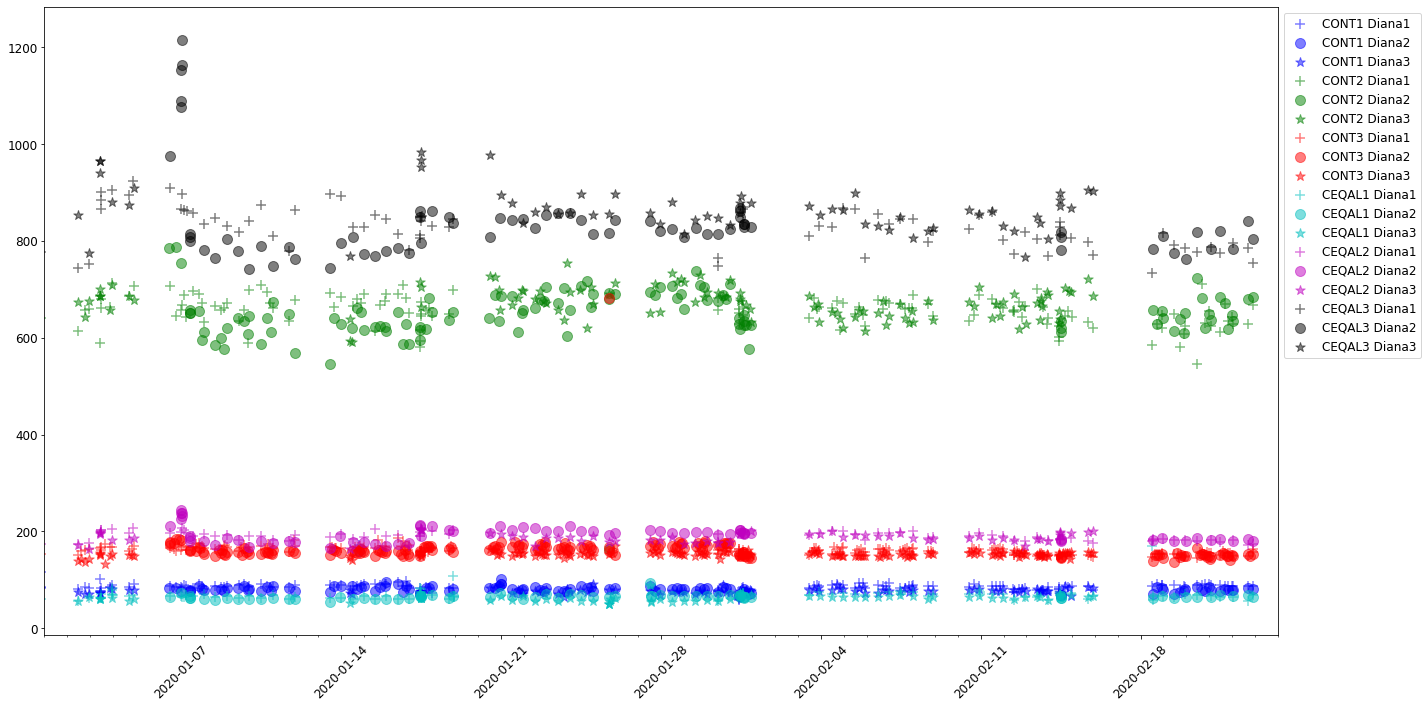

In [70]:



markers = itertools.cycle(('+', 'o', '*')) 
colours = itertools.cycle(('b', 'g', 'r','c','m','k')) 

#plot the data
# plt.figure()
fig, ax = plt.subplots(figsize=(20,10))
for qc_id in qc_ids:
    df_tempory = df[df[' QC ID'] == qc_id]
    colour = next(colours)
    for analyzer in analyzers:
        df_tempory2 = df_tempory[df_tempory[' Analyzer'] == analyzer]
        plt.scatter(df_tempory2['Date of Result'].values,df_tempory2[' Result Value'].values,s=100,c=colour,marker = next(markers),alpha=0.5,label = qc_id+' '+analyzer)

        
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
weeks = mdates.WeekdayLocator()  # every week
days = mdates.DayLocator()  # every day
hours = mdates.HourLocator(interval=4)  # every hour


if (max_date-min_date).days > 7:
    ax.xaxis.set_major_locator(weeks) # could substitute in years, months, or days for 'weeks' here (as defined above)
    ax.xaxis.set_minor_locator(days) # interval for the small lines on the axis
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) # could swap %Y-%m-%d for e.g. '%d/%m' to have day then month with a slash in between. See thhis link for pretty comprehesive date formating list https://www.ibm.com/support/knowledgecenter/SSQHWE_10.1.0/com.ibm.ondemand.mp.doc/arsa0257.htm
    plt.xticks(rotation=45)
if (max_date-min_date).days <= 7:
    ax.xaxis.set_major_locator(days) # could substitute in years, months, or days for 'weeks' here (as defined above)
    ax.xaxis.set_minor_locator(hours) # interval for the small lines on the axis
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H')) # could swap %Y-%m-%d for e.g. '%d/%m' to have day then month with a slash in between. See thhis link for pretty comprehesive date formating list https://www.ibm.com/support/knowledgecenter/SSQHWE_10.1.0/com.ibm.ondemand.mp.doc/arsa0257.htm
    ax.xaxis.set_minor_formatter(mdates.DateFormatter('%H')) # could swap %Y-%m-%d for e.g. '%d/%m' to have day then month with a slash in between. See thhis link for pretty comprehesive date formating list https://www.ibm.com/support/knowledgecenter/SSQHWE_10.1.0/com.ibm.ondemand.mp.doc/arsa0257.htm
    plt.xticks(rotation=90)
    

ax.set_xlim([min_date,max_date])

#display the plot
plt.legend(bbox_to_anchor=(1.0, 1.00))

plt.tight_layout()
plt.savefig('./all_analysers_and_controls.png',dpi=300)
# plt.savefig('/Users/SPH/qc_data/all_analysers_and_controls.png',dpi=300)

plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/SPH/qc_data/Diana1_all_controls.png'

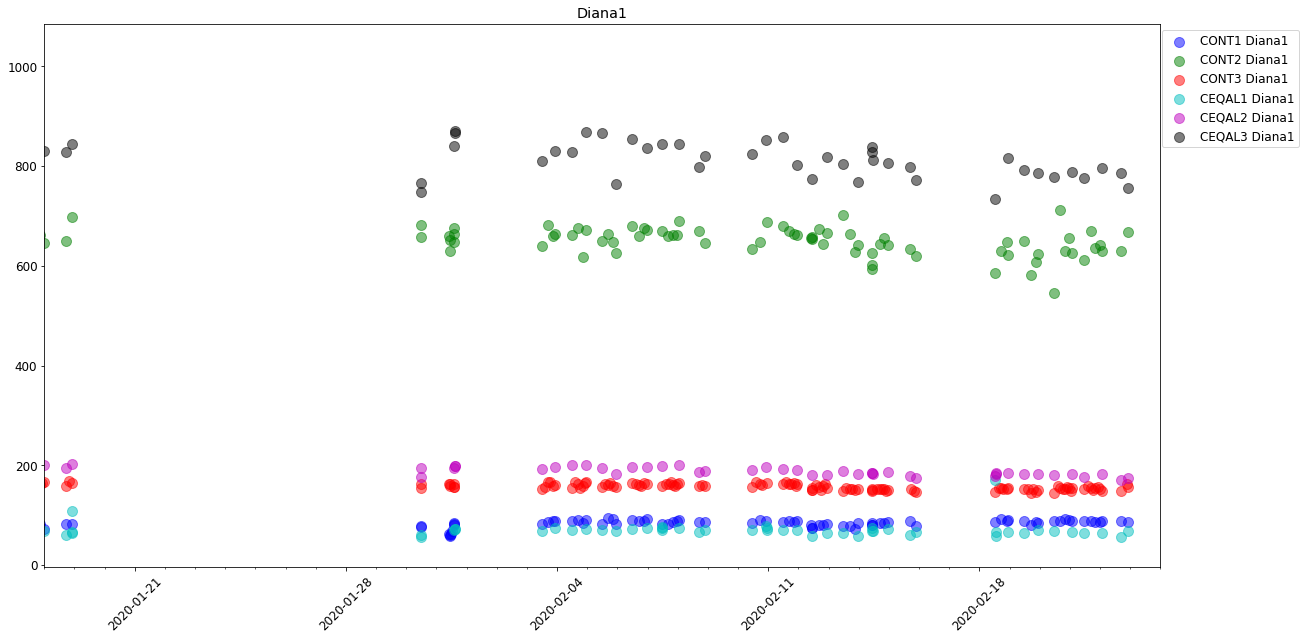

In [58]:


markers = itertools.cycle(('+', 'o', '*')) 
colours = itertools.cycle(('b', 'g', 'r','c','m','k')) 

for analyzer in analyzers:
    #plot the data
    # plt.figure()
    f, ax = plt.subplots(figsize=(20,10))
    for qc_id in qc_ids:
        df_tempory = df[df[' QC ID'] == qc_id]
        colour = next(colours)
    #     for analyzer in analyzers:
        df_tempory2 = df_tempory[df_tempory[' Analyzer'] == analyzer]
        plt.scatter(df_tempory2['Date of Result'].values,df_tempory2[' Result Value'].values,s=100,c=colour,alpha=0.5,label = qc_id+' '+analyzer)

        

    years = mdates.YearLocator()   # every year
    months = mdates.MonthLocator()  # every month
    weeks = mdates.WeekdayLocator()  # every week
    days = mdates.DayLocator()  # every day
    hours = mdates.HourLocator(interval=4)  # every 4th hour


    if (max_date-min_date).days > 7:
        ax.xaxis.set_major_locator(weeks) # could substitute in years, months, or days for 'weeks' here (as defined above)
        ax.xaxis.set_minor_locator(days) # interval for the small lines on the axis
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) # could swap %Y-%m-%d for e.g. '%d/%m' to have day then month with a slash in between. See thhis link for pretty comprehesive date formating list https://www.ibm.com/support/knowledgecenter/SSQHWE_10.1.0/com.ibm.ondemand.mp.doc/arsa0257.htm
        plt.xticks(rotation=45)
    if (max_date-min_date).days <= 7:
        ax.xaxis.set_major_locator(days) # could substitute in years, months, or days for 'weeks' here (as defined above)
        ax.xaxis.set_minor_locator(hours) # interval for the small lines on the axis
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H')) # could swap %Y-%m-%d for e.g. '%d/%m' to have day then month with a slash in between. See thhis link for pretty comprehesive date formating list https://www.ibm.com/support/knowledgecenter/SSQHWE_10.1.0/com.ibm.ondemand.mp.doc/arsa0257.htm
        ax.xaxis.set_minor_formatter(mdates.DateFormatter('%H')) # could swap %Y-%m-%d for e.g. '%d/%m' to have day then month with a slash in between. See thhis link for pretty comprehesive date formating list https://www.ibm.com/support/knowledgecenter/SSQHWE_10.1.0/com.ibm.ondemand.mp.doc/arsa0257.htm
        plt.xticks(rotation=90)


    ax.set_xlim([min_date,max_date])
        
    #display the plot
    plt.legend(bbox_to_anchor=(1.13, 1.00))

    plt.title(analyzer)
    plt.savefig('/Users/SPH/qc_data/'+analyzer+'_all_controls.png',dpi=300)
    plt.show()

In [ ]:
#save the data with the improved date column to files
df.to_csv('/Users/SPH/qc_data/cco_qc_analysis_for_excel.csv')